<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




C:\Users\pangr\AppData\Local\Temp\ipykernel_17796\2428465171.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_numeric'].fillna(df['Age_numeric'].median(), inplace=True)
C:\Users\pangr\AppData\Local\Temp\ipykernel_17796\2428465171.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

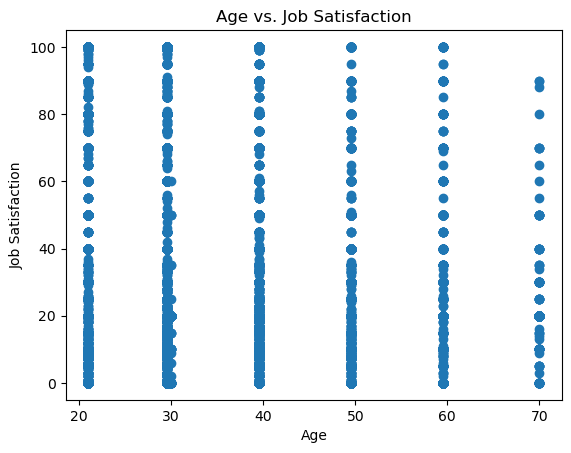

In [4]:
## Write your code here
age_mapping = {
    'under 18 years old': 17,
    '18-24 years old': (18 + 24) / 2,
    '25-34 years old': (25 + 34) / 2,
    '35-44 years old': (35 + 44) / 2,
    '45-54 years old': (45 + 54) / 2,
    '55-64 years old': (55 + 64) / 2,
    '65 years or older': 70,
    'Prefer not to say': 30
}
df['Age_numeric'] = df['Age'].map(age_mapping)
df['Age_numeric'].fillna(df['Age_numeric'].median(), inplace=True)

df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_6'].fillna(df['JobSatPoints_6'].median(), inplace=True)


# plot graph
plt.scatter(df['Age_numeric'], df['JobSatPoints_6'])
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.title('Age vs. Job Satisfaction')
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


C:\Users\pangr\AppData\Local\Temp\ipykernel_17796\160312063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(0, inplace=True)


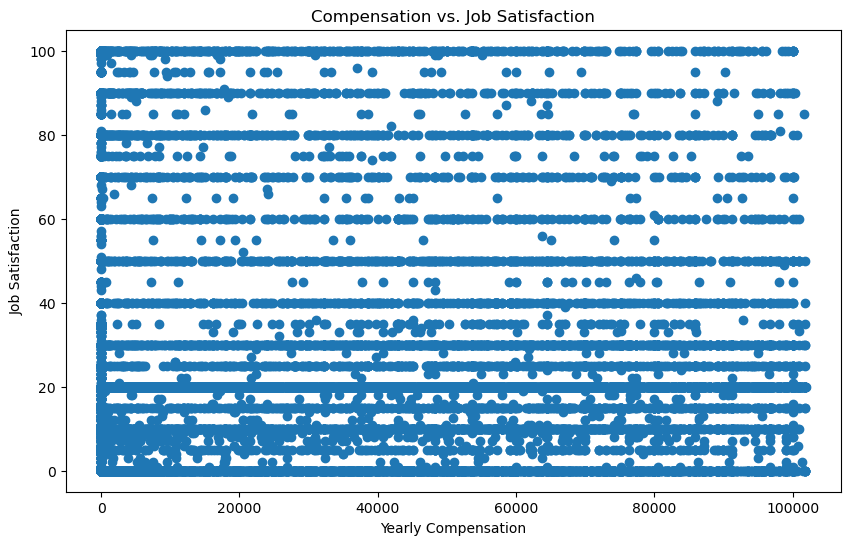

In [7]:
## Write your code here
df['ConvertedCompYearly'].fillna(0, inplace=True)

#Remove outliner of CompTotal
# 1. Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Remove outliners
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

#plot graph
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['ConvertedCompYearly'], df_no_outliers['JobSatPoints_6'])
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs. Job Satisfaction')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


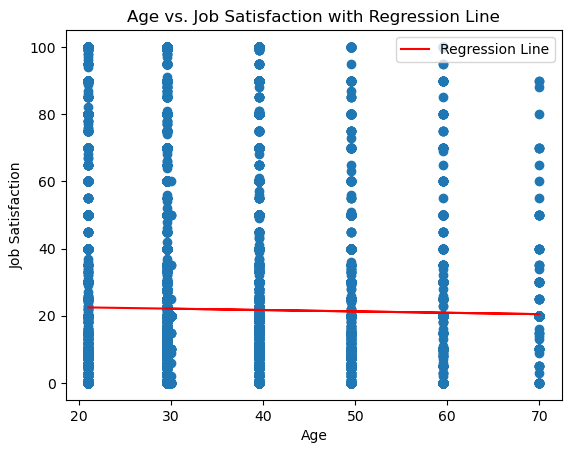

In [9]:
## Write your code here
import numpy as np

# Calculate the linear regression line
slope, intercept = np.polyfit(df['Age_numeric'], df['JobSatPoints_6'], 1)
regression_line = slope * df['Age_numeric'] + intercept

# Plot the scatter plot with the regression line
plt.scatter(df['Age_numeric'], df['JobSatPoints_6'])
plt.plot(df['Age_numeric'], regression_line, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.title('Age vs. Job Satisfaction with Regression Line')
plt.legend()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


C:\Users\pangr\AppData\Local\Temp\ipykernel_17796\576586479.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro_numeric'].fillna(df['YearsCodePro_numeric'].median(), inplace=True)


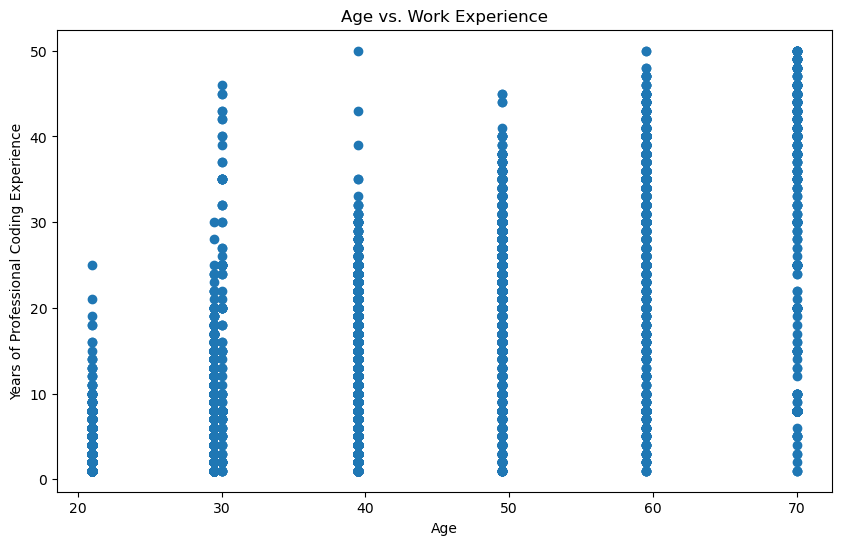

In [11]:
## Write your code here
# Convert 'YearsCodePro' to numeric, handling non-numeric values
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['YearsCodePro_numeric'].fillna(df['YearsCodePro_numeric'].median(), inplace=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age_numeric'], df['YearsCodePro_numeric'])
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Age vs. Work Experience')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


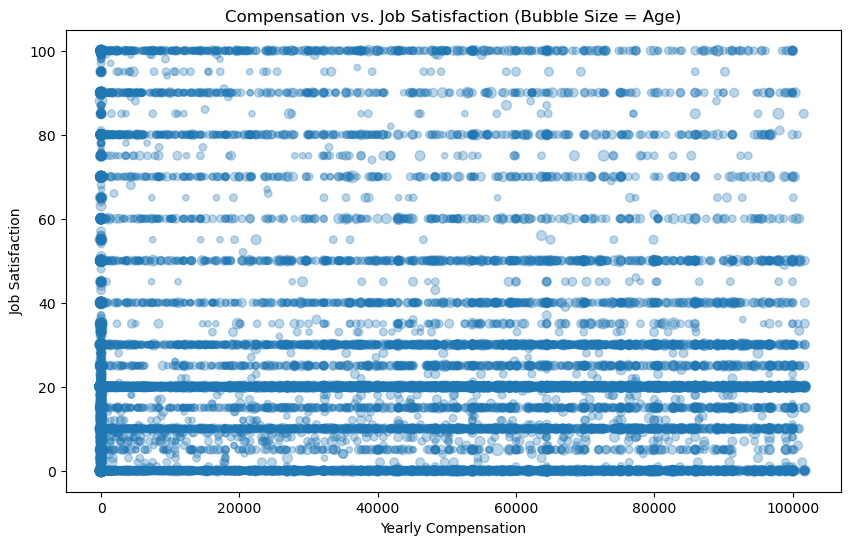

In [13]:
## Write your code here
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['ConvertedCompYearly'], df_no_outliers['JobSatPoints_6'], s=df_no_outliers['Age_numeric'], alpha=0.3)
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


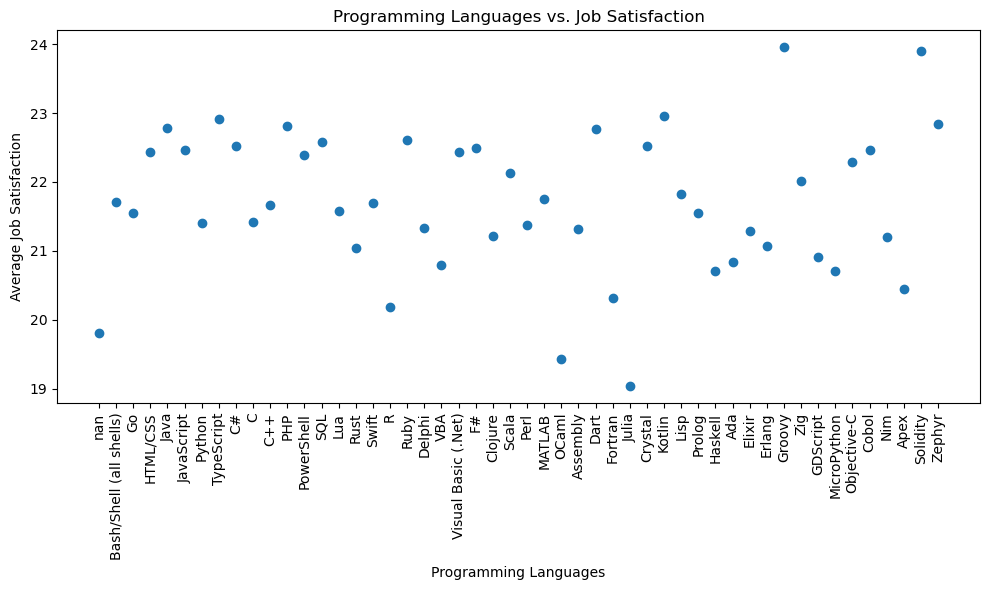

In [15]:
## Write your code here
# Create a mapping of languages to their corresponding job satisfaction points
language_satisfaction = {}
for index, row in df.iterrows():
    languages = str(row['LanguageHaveWorkedWith']).split(';')
    for lang in languages:
        if lang not in language_satisfaction:
            language_satisfaction[lang] = []
        language_satisfaction[lang].append(row['JobSatPoints_6'])

# Create the scatter plot
languages = list(language_satisfaction.keys())
satisfaction_levels = [np.mean(values) for values in language_satisfaction.values()]

plt.figure(figsize=(10, 6))
plt.scatter(languages, satisfaction_levels)
plt.xlabel('Programming Languages')
plt.ylabel('Average Job Satisfaction')
plt.title('Programming Languages vs. Job Satisfaction')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


C:\Users\pangr\AppData\Local\Temp\ipykernel_17796\2650396767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Employment'] = df_no_outliers['Employment'].str.split(';')


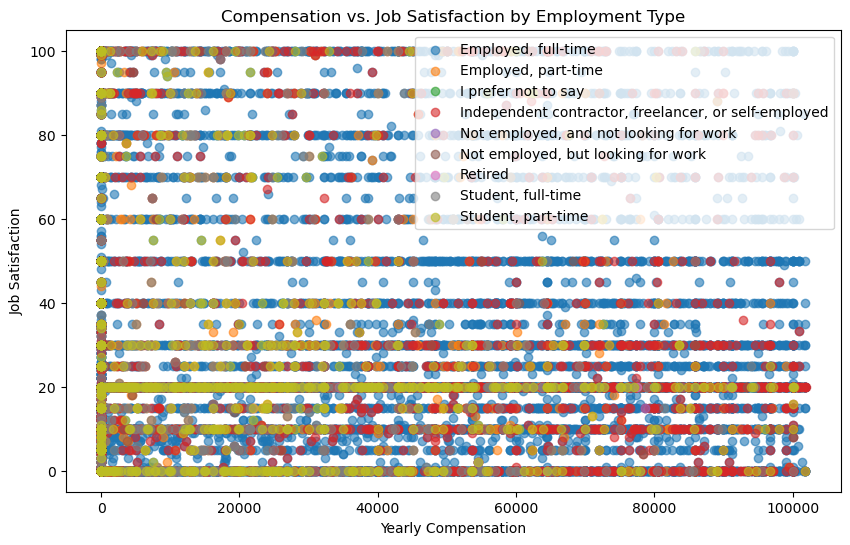

In [17]:
## Write your code here
df_no_outliers['Employment'] = df_no_outliers['Employment'].str.split(';')
df_no_outliers = df_no_outliers.explode('Employment')
df_no_outliers.reset_index(drop=True, inplace=True)


employment_groups = df_no_outliers.groupby('Employment')

# Create the scatter plot with color-coding by employment type
plt.figure(figsize=(10, 6))

for employment_type, group_data in employment_groups:
    plt.scatter(group_data['ConvertedCompYearly'], group_data['JobSatPoints_6'], label=employment_type, alpha=0.6)

plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.legend()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


C:\Users\pangr\AppData\Local\Temp\ipykernel_17796\3100654171.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


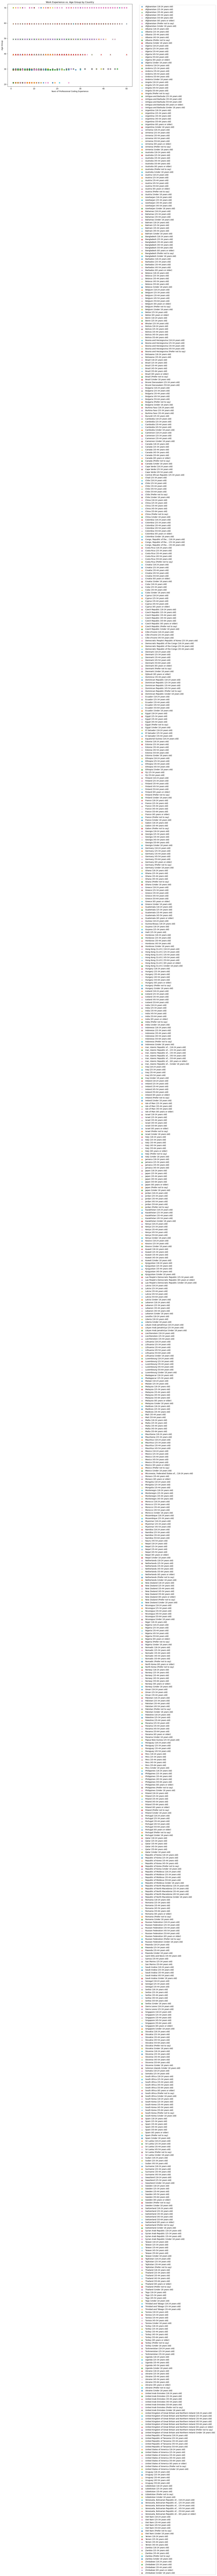

In [19]:
## Write your code here

# Group data by country and age
country_age_groups = df.groupby(['Country', 'Age'])

# Create the scatter plot
plt.figure(figsize=(12, 8))

for (country, age), group_data in country_age_groups:
    marker = 'o'  # Default marker
    if '18-24' in age:
      marker = 'o'
    elif '25-34' in age:
      marker = 's'
    elif '35-44' in age:
      marker = '^'
    elif '45-54' in age:
      marker = 'x'
    elif '55-64' in age:
      marker = '*'
    elif 'under 18' in age:
      marker = 'p'
    elif '65' in age:
      marker = 'h'
    else:
      marker = 'D'

    plt.scatter(group_data['YearsCodePro_numeric'], group_data['Age_numeric'], label=f'{country} ({age})', marker=marker, alpha=0.7)

plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Age Group')
plt.title('Work Experience vs. Age Group by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # Place legend outside the plot
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
